## SVM with Scikit-Learn

In [13]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score

### Load the modified Iris dataset

In [14]:
# Iris dataset.
iris = datasets.load_iris()     # Load Iris dataset.

X = iris.data                   # The shape of X is (150, 4), which means
                                # there are 150 data points, each data point
                                # has 4 features.

# Here for convenience, we divide the 3 kinds of flowers into 2 groups: 
#     Y = 0 (or False):  Setosa (original value 0) / Versicolor (original value 1)
#     Y = 1 (or True):   Virginica (original value 2)

# Thus we use (iris.target > 1.5) to divide the targets into 2 groups. 
# This line of code will assign:
#    Y[i] = True  (which is equivalent to 1) if iris.target[k]  > 1.5 (Virginica)
#    Y[i] = False (which is equivalent to 0) if iris.target[k] <= 1.5 (Setosa / Versicolor)

Y = (iris.target > 1.5).reshape(-1,1).astype(np.float) # The shape of Y is (150, 1), which means 
                                # there are 150 data points, each data point
                                # has 1 target value. 
Y[Y==0] = -1

X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape)
print(Y.shape)
print(X_and_Y[0])               # The result should be always: [ 5.8  4.   1.2  0.2  -1. ]

(150, 4)
(150, 1)
[ 5.8  4.   1.2  0.2 -1. ]


In [15]:
# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:4]
Y_shuffled = X_and_Y[:,4]


X_train = X_shuffled[:100][:,[3,1]] # Shape: (100,2)
X_train = np.delete(X_train, 42, axis=0) # Remove a point for separability.
Y_train = Y_shuffled[:100]          # Shape: (100,)
Y_train = np.delete(Y_train, 42, axis=0) # Remove a point for separability.
X_test = X_shuffled[100:][:,[3,1]]  # Shape: (50,2)
Y_test = Y_shuffled[100:]           # Shape: (50,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(99, 2)
(99,)
(50, 2)
(50,)


### Visualization

In [4]:
def vis(X, Y, W=None, b=None):
    indices_neg1 = (Y == -1).nonzero()[0]
    indices_pos1 = (Y == 1).nonzero()[0]
    plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1], 
                c='blue', label='class -1')
    plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1], 
                c='red', label='class 1')
    plt.legend()
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    
    if W is not None:
        # w0x0+w1x1+b=0 => x1=-w0x0/w1-b/w1
        w0 = W[0]
        w1 = W[1]
        temp = -w1*np.array([X[:,1].min(), X[:,1].max()])/w0-b/w0
        x0_min = max(temp.min(), X[:,0].min())
        x0_max = min(temp.max(), X[:,1].max())
        x0 = np.linspace(x0_min,x0_max,100)
        x1 = -w0*x0/w1-b/w1
        plt.plot(x0,x1,color='black')

    plt.show()

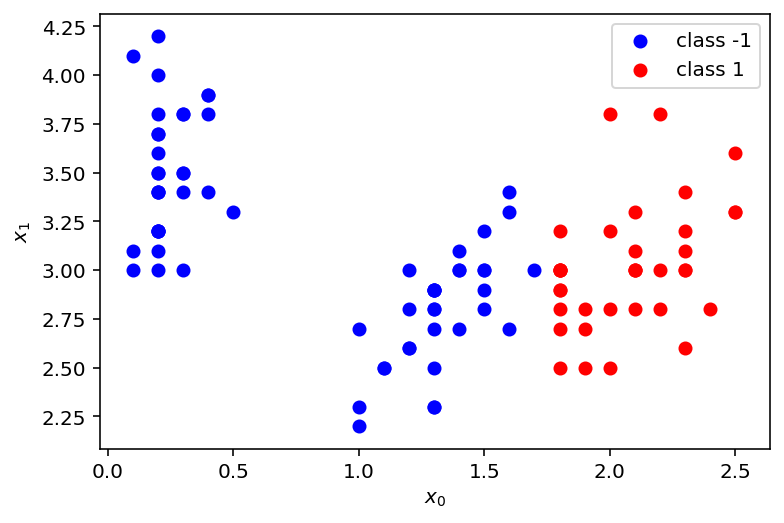

In [5]:
# Visualize training set.
vis(X_train, Y_train)

### Linear SVM Using Scikit-Learn

In [25]:
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X) # Hint: Use classifier.predict()
    e = 1-accuracy_score(Y,Y_pred) #Hint: Use accuracy_score().
    return e

C = 0.1
Decision boundary: 1.307x0+-0.520x1+-0.397=0


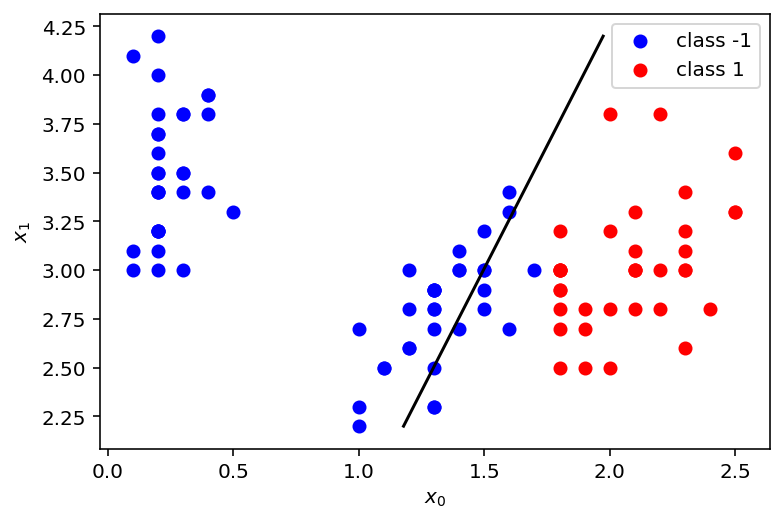

Training error: 0.101010101010101




C = 1
Decision boundary: 3.446x0+-1.386x1+-1.665=0


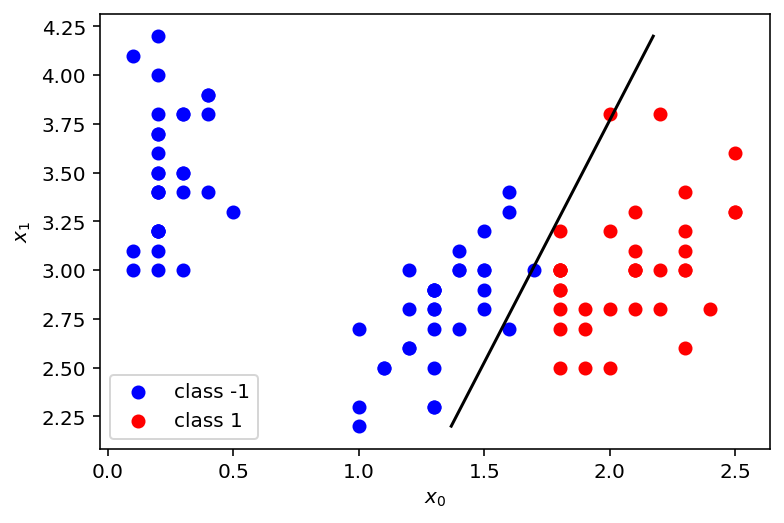

Training error: 0.030303030303030276




C = 10
Decision boundary: 6.666x0+-1.905x1+-5.286=0


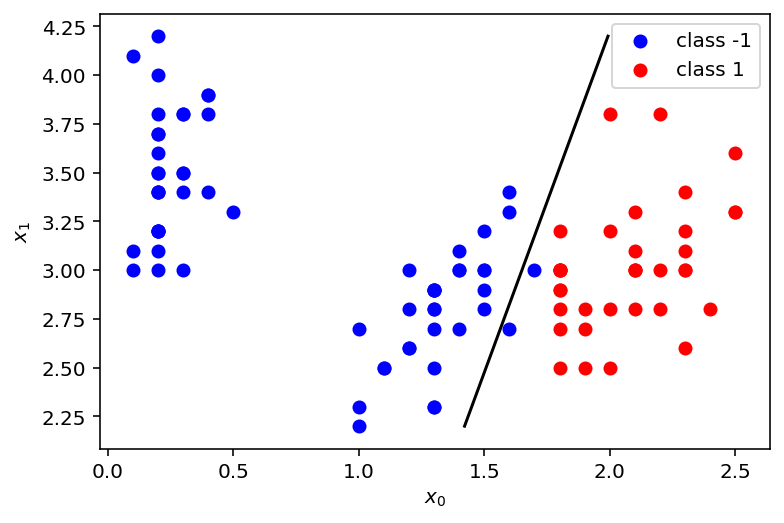

Training error: 0.02020202020202022




C = 100
Decision boundary: 9.290x0+-0.473x1+-14.305=0


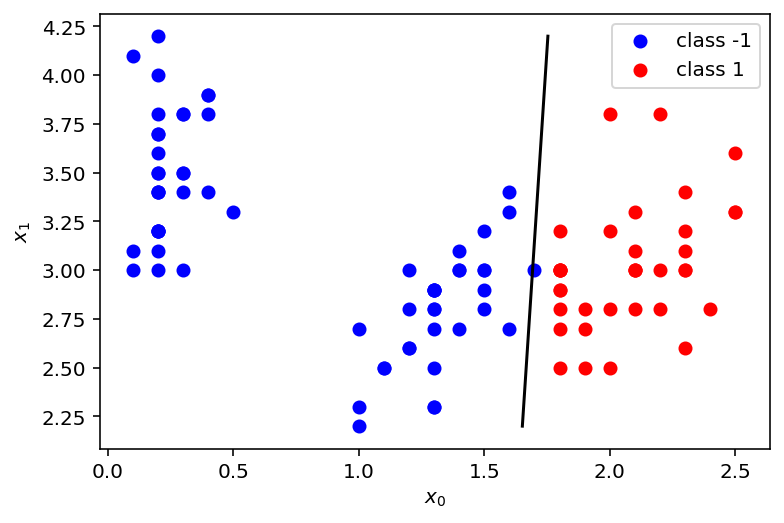

Training error: 0.010101010101010055




C = 1000
Decision boundary: 15.768x0+-1.600x1+-22.583=0


C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


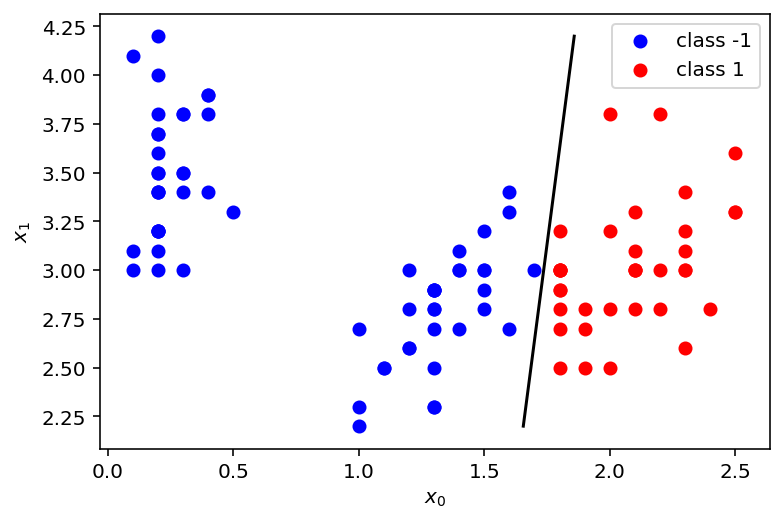

Training error: 0.0






In [26]:
C_list = [0.1, 1, 10, 100, 1000]
opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.

for C in C_list:
    # Create a linear SVM classifier.
    # Hints: You can use svm.LinearSVC()
    #        Besides, we use Hinge loss and L2 penalty for weights.
    #        The max iterations should be set to 10000.
    #        The regularization parameter should be set as C.
    #        The other arguments of svm.LinearSVC() are set as default values.
    classifier = svm.LinearSVC(penalty='l2',loss='hinge',C=C,max_iter=10000)
    
    # Use the classifier to fit the training set (use X_train, Y_train).
    # Hint: You can use classifier.fit().
    classifier.fit(X_train,Y_train)

    # Obtain the weights and bias from the linear SVM classifier.
    W = classifier.coef_[0]
    b = classifier.intercept_[0]
    
    # Show decision boundary, training error and test error.
    print('C = {}'.format(C))
    print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(W[0],W[1],b))
    vis(X_train, Y_train, W, b)
    e_training = calc_error(X_train, Y_train, classifier)
    print('Training error: {}'.format(e_training))
    print('\n\n\n')
    
    # Judge if it is the optimal one.
    if e_training < opt_e_training:
        opt_e_training = e_training
        opt_classifier = classifier
        opt_C = C

Best parameter C* = 1000
Decision boundary: 15.768x0+-1.600x1+-22.583=0


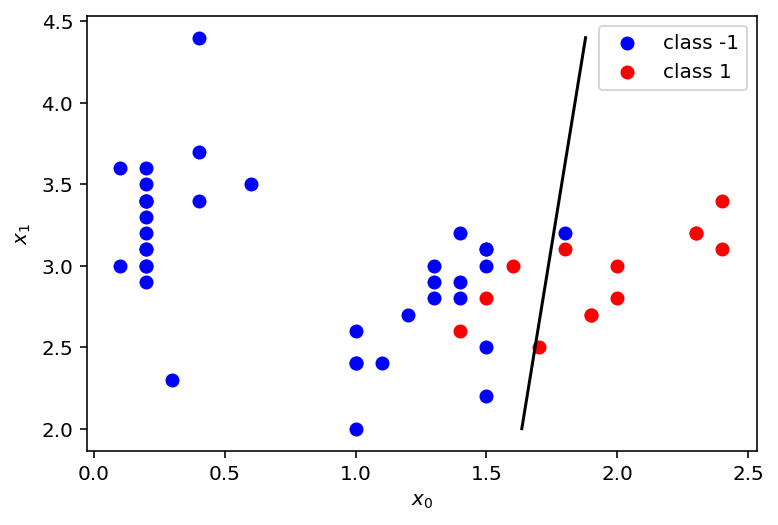

Test error: 0.07999999999999996


In [27]:
# Obtain the weights and bias from the best linear SVM classifier .
opt_W = opt_classifier.coef_[0]
opt_b = opt_classifier.intercept_[0]
print('Best parameter C* = {}'.format(opt_C))
print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(opt_W[0],opt_W[1],opt_b))
vis(X_test, Y_test, opt_W, opt_b)
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))